## Exploratory Data Analysis 

#### Importing Libraries 

In [50]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from src.utils import check_missing_data, merge_and_sort
from scripts.db_utils import connect, sql_to_dataframe
from src.descriptive_statistics import describe_numerical, summarize_categorical, summarize_time_series
from src.plots import display_summary_table, plot_histograms, plot_bar_charts, plot_time_series, plot_time_series_by_category, plot_time_series_for_single_category, plot_bar_chart_for_cols, plot_categorical_two_cols_unstack, merged_by_date_two_cols_plot

##### Load data

In [51]:
#opening the connection
conn = connect()

# load telegram post data for banks
query = """ SELECT * FROM public.telegram_post_performance  """
df_posts = sql_to_dataframe(conn, query)

# load BOA App review data 
query = """ SELECT * FROM public.google_play_reviews  """
df_reviews = sql_to_dataframe(conn, query)

# load BOA telegram channnel subscribers data
query = """ SELECT * FROM public.telegram_subscription_growth  """
df_subscribers = sql_to_dataframe(conn, query)

#closing the connection
conn.close()

Connecting..
All good, Connection successful!


In [52]:
df_posts.head()

,id,post_link,date,views,post_time,bank,time_of_day
0,430,https://t.me/tikvahethiopia/70382,2022-05-19 13:47:14,310300,13:47:14,#CBE,afternoon
1,431,https://t.me/tikvahethiopia/70383,2022-05-19 13:47:14,310300,13:47:14,#CBE,afternoon
2,432,https://t.me/tikvahethiopia/73378,2022-08-30 11:13:05,267400,11:13:05,#CBE,morning
3,433,https://t.me/tikvahethiopia/73379,2022-08-30 11:13:05,267400,11:13:05,#CBE,morning
4,434,https://t.me/tikvahethiopia/74556,2022-11-03 16:07:35,347100,16:07:35,#CBE,afternoon


In [53]:
df_reviews.head()

,id,review_id,username,user_image,likes,review_created_version,created_at,reply_content,replied_at,app_version,score,user_comments,sentiment
0,301,738b6d3a-2d7f-4a82-bfe2-dcf32591f944,NAHOM NIGUSSIE,https://play-lh.googleusercontent.com/a-/ALV-U...,1,None,2024-05-21 18:38:00,None,None,None,2,Slow and buggy crashed all the time need a lot...,None
1,359,97088da4-b2b2-41d5-aed3-d5779224dd2c,Gadisa Worku,https://play-lh.googleusercontent.com/a-/ALV-U...,3,None,2024-04-27 18:52:00,None,None,None,5,wow best,positive
2,582,73f583f3-dd86-4bde-9a65-547549cdb591,Aysanew Yonas,https://play-lh.googleusercontent.com/a-/ALV-U...,3,None,2024-02-25 11:23:00,None,None,None,3,"Apollo is trying to bring something new, somet...",negative
3,583,813caeea-ca71-4385-9497-cf99a1d5c7de,hawi degefa,https://play-lh.googleusercontent.com/a/ACg8oc...,0,None,2024-02-25 06:27:00,None,None,None,1,The worest app i have ever seen.......-10,neutral
4,584,65a804b1-0506-454e-89e6-04e5d1ae997d,Mujahid Mohammed,https://play-lh.googleusercontent.com/a-/ALV-U...,0,24.02.14,2024-02-25 01:17:00,None,None,24.02.14,1,Fake uninstal,negative


In [54]:
df_subscribers

,id,channel_id,date,subscriber_count
0,1424,None,2024-05-24,-1
1,1425,None,2024-05-23,24
2,1426,None,2024-05-22,-104
3,1427,None,2024-05-21,-10
4,1428,None,2024-05-20,104
...,...,...,...,...
200,1624,None,2023-11-06,-24
201,1625,None,2023-11-05,67
202,1626,None,2023-11-04,183
203,1627,None,2023-11-03,117


In [55]:
# Remove leading and trailing whitespaces
df_posts['time_of_day'] = df_posts['time_of_day'].str.strip()

#### Data Summarization

In [56]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           182 non-null    int64         
 1   post_link    182 non-null    object        
 2   date         181 non-null    datetime64[ns]
 3   views        182 non-null    int64         
 4   post_time    181 non-null    object        
 5   bank         182 non-null    object        
 6   time_of_day  181 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 10.1+ KB


In [57]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      300 non-null    int64         
 1   review_id               300 non-null    object        
 2   username                300 non-null    object        
 3   user_image              300 non-null    object        
 4   likes                   300 non-null    int64         
 5   review_created_version  213 non-null    object        
 6   created_at              300 non-null    datetime64[ns]
 7   reply_content           0 non-null      object        
 8   replied_at              0 non-null      object        
 9   app_version             213 non-null    object        
 10  score                   300 non-null    int64         
 11  user_comments           300 non-null    object        
 12  sentiment               299 non-null    object    

In [58]:
df_subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                205 non-null    int64         
 1   channel_id        0 non-null      object        
 2   date              205 non-null    datetime64[ns]
 3   subscriber_count  205 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.5+ KB


In [59]:
# select categorical columns 
df_posts_categorical = df_posts[['bank', 'time_of_day']]
df_reviews_categorical = df_reviews[['app_version', 'sentiment']]

In [60]:
# summerization for categorical datasets 
posts_categorical_summary = summarize_categorical(df_posts_categorical)
display_summary_table(posts_categorical_summary)


bank:
+----+---------------------+---------+
|    | bank                |   count |
|----+---------------------+---------|
|  0 | #CBE                |      85 |
|  1 | BOA                 |      46 |
|  2 | #GlobalBankEthiopia |      27 |
|  3 | #Hibretbank         |      15 |
|  4 | #AwashBank          |       5 |
|  5 | #WegagenBank        |       4 |
+----+---------------------+---------+

time_of_day:
+----+---------------+---------+
|    | time_of_day   |   count |
|----+---------------+---------|
|  0 | afternoon     |      73 |
|  1 | morning       |      53 |
|  2 | evening       |      52 |
|  3 | night         |       3 |
+----+---------------+---------+


In [61]:
# summerization for categorical datasets 
reviews_categorical_summary = summarize_categorical(df_reviews_categorical)
display_summary_table(reviews_categorical_summary)


app_version:
+----+---------------+---------+
|    | app_version   |   count |
|----+---------------+---------|
|  0 | 24.03.04      |     132 |
|  1 | 24.04.23      |      34 |
|  2 | 24.02.14      |      25 |
|  3 | 23.12.29      |       5 |
|  4 | 24.01.17      |       5 |
|  5 | 23.10.24      |       3 |
|  6 | 23.07.24      |       2 |
|  7 | 23.08.03      |       1 |
|  8 | 23.12.09      |       1 |
|  9 | 23.07.08      |       1 |
| 10 | 22.10.27      |       1 |
| 11 | 23.06.17      |       1 |
| 12 | 23.12.18      |       1 |
| 13 | 24.02.09      |       1 |
+----+---------------+---------+

sentiment:
+----+-------------+---------+
|    | sentiment   |   count |
|----+-------------+---------|
|  0 | positive    |     149 |
|  1 | neutral     |      97 |
|  2 | negative    |      53 |
+----+-------------+---------+


In [62]:
# select number columns 
df_posts_numerical = df_posts[['views']]
df_reviews_numerical = df_reviews[['likes', 'score']]
df_subscribers_numerical = df_subscribers[['subscriber_count']]

In [63]:
# describe numerical datasets 
posts_numberical = describe_numerical(df_posts_numerical)
display_summary_table(posts_numberical)


views:
+----+---------+----------+
|    | index   |    views |
|----+---------+----------|
|  0 | count   |    182   |
|  1 | mean    | 265786   |
|  2 | std     |  37187.2 |
|  3 | min     | 129400   |
|  4 | 25%     | 242975   |
|  5 | 50%     | 264450   |
|  6 | 75%     | 291911   |
|  7 | max     | 347100   |
+----+---------+----------+


In [64]:
# describe numerical datasets 
reviews_numberical = describe_numerical(df_reviews_numerical)
display_summary_table(reviews_numberical)


likes:
+----+---------+----------+
|    | index   |    likes |
|----+---------+----------|
|  0 | count   | 300      |
|  1 | mean    |   5      |
|  2 | std     |  34.2237 |
|  3 | min     |   0      |
|  4 | 25%     |   0      |
|  5 | 50%     |   1      |
|  6 | 75%     |   1      |
|  7 | max     | 549      |
+----+---------+----------+

score:
+----+---------+----------+
|    | index   |    score |
|----+---------+----------|
|  0 | count   | 300      |
|  1 | mean    |   3.23   |
|  2 | std     |   1.8225 |
|  3 | min     |   1      |
|  4 | 25%     |   1      |
|  5 | 50%     |   4      |
|  6 | 75%     |   5      |
|  7 | max     |   5      |
+----+---------+----------+


In [65]:
# describe numerical datasets 
subscribers_numberical = describe_numerical(df_subscribers_numerical)
display_summary_table(subscribers_numberical)


subscriber_count:
+----+---------+--------------------+
|    | index   |   subscriber_count |
|----+---------+--------------------|
|  0 | count   |           205      |
|  1 | mean    |            48.9512 |
|  2 | std     |           265.438  |
|  3 | min     |          -230      |
|  4 | 25%     |           -78      |
|  5 | 50%     |           -25      |
|  6 | 75%     |            43      |
|  7 | max     |          2030      |
+----+---------+--------------------+


In [66]:
# do some time analysis on time related columns 
summarize_time_series(df_posts, 'date')

Number of Unique Dates: 155
Start Date: 2018-05-23 00:00:00
End Date: 2024-05-20 06:25:35


In [67]:
# do some time analysis on time related columns 
summarize_time_series(df_reviews, 'created_at')

Number of Unique Dates: 300
Start Date: 2024-02-20 11:46:00
End Date: 2024-05-21 18:38:00


In [68]:
# do some time analysis on time related columns 
summarize_time_series(df_subscribers, 'date')

Number of Unique Dates: 205
Start Date: 2023-11-02 00:00:00
End Date: 2024-05-24 00:00:00


#### Data Quality Assessment

In [69]:
# checking for missing values
missing_data_df_post = check_missing_data(df_posts)
print(missing_data_df_post)

   Column Name  Missing Values  Percentage Missing
2         date               1            0.549451
4    post_time               1            0.549451
6  time_of_day               1            0.549451


In [70]:
# checking for missing values
missing_data_df_reveiws = check_missing_data(df_reviews)
print(missing_data_df_reveiws)

               Column Name  Missing Values  Percentage Missing
5   review_created_version              87           29.000000
7            reply_content             300          100.000000
8               replied_at             300          100.000000
9              app_version              87           29.000000
12               sentiment               1            0.333333


In [71]:
# checking for missing values
missing_data_df_subscribers = check_missing_data(df_subscribers)
print(missing_data_df_subscribers)

  Column Name  Missing Values  Percentage Missing
1  channel_id             205               100.0


#### Data cleaning

In [72]:
df_subscribers.drop('channel_id', axis=1, inplace=True)

In [73]:
# checking for missing values
missing_data_df_subscribers = check_missing_data(df_subscribers)
print(missing_data_df_subscribers)

Success: No missing values.


In [74]:
df_posts.dropna(subset=['date', 'post_time', 'time_of_day'], inplace=True)

In [75]:
# checking for missing values
missing_data_df_post = check_missing_data(df_posts)
print(missing_data_df_post)

Success: No missing values.


In [76]:
df_reviews['review_created_version'] = df_reviews['review_created_version'].ffill()
df_reviews['app_version'] = df_reviews['app_version'].ffill()

In [77]:
# checking for missing values
missing_data_df_reveiws = check_missing_data(df_reviews)
print(missing_data_df_reveiws)

               Column Name  Missing Values  Percentage Missing
5   review_created_version               4            1.333333
7            reply_content             300          100.000000
8               replied_at             300          100.000000
9              app_version               4            1.333333
12               sentiment               1            0.333333


#### Univariate analysis

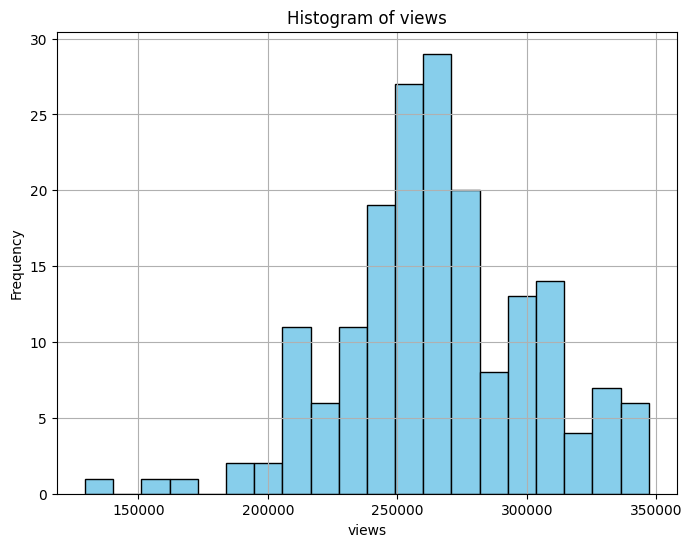

In [78]:
# plot histograms for numerical columns 
plot_histograms(df_posts_numerical)

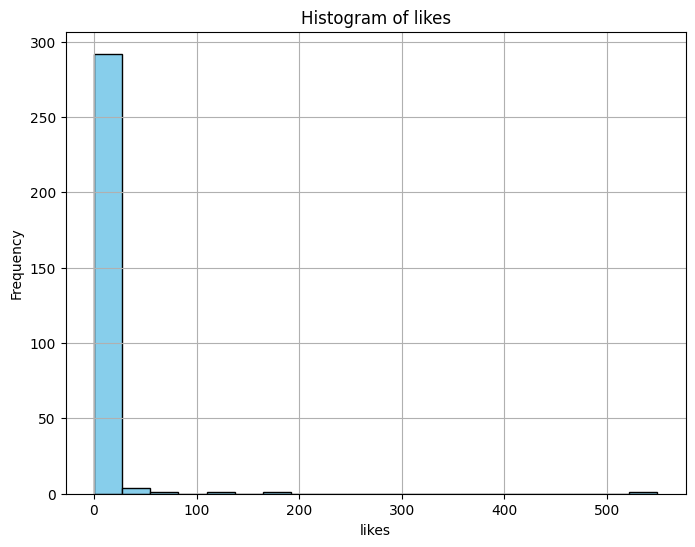

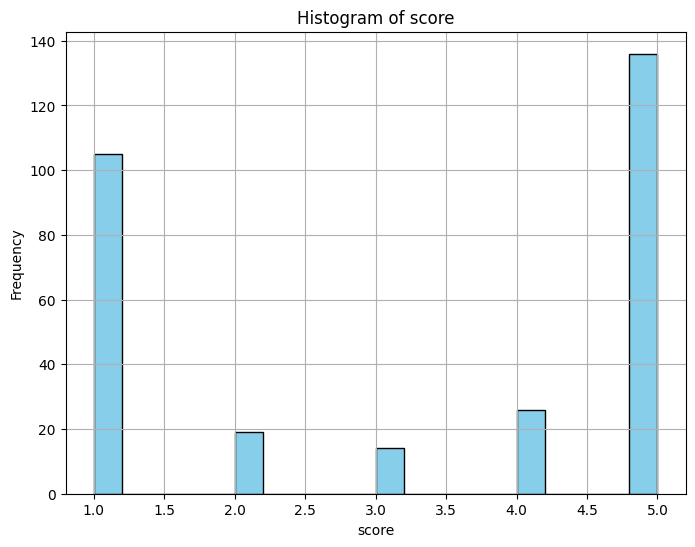

In [79]:
# plot histograms for numerical columns 
plot_histograms(df_reviews_numerical)

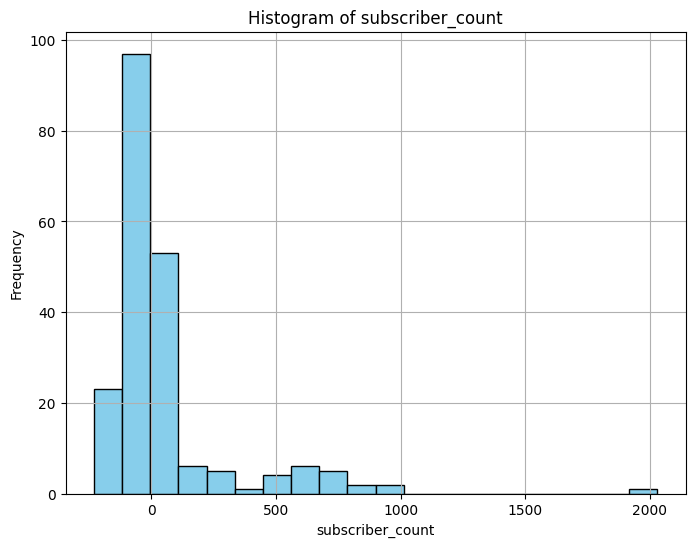

In [80]:
# plot histograms for numerical columns 
plot_histograms(df_subscribers_numerical)

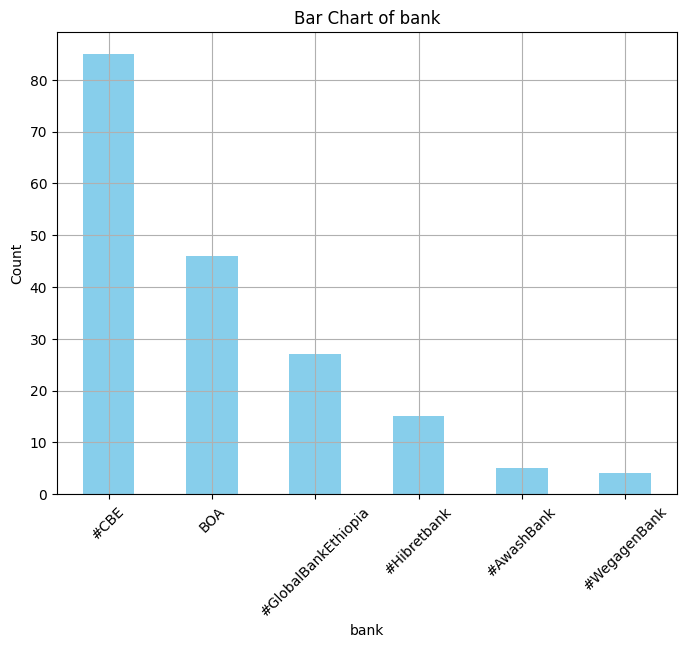

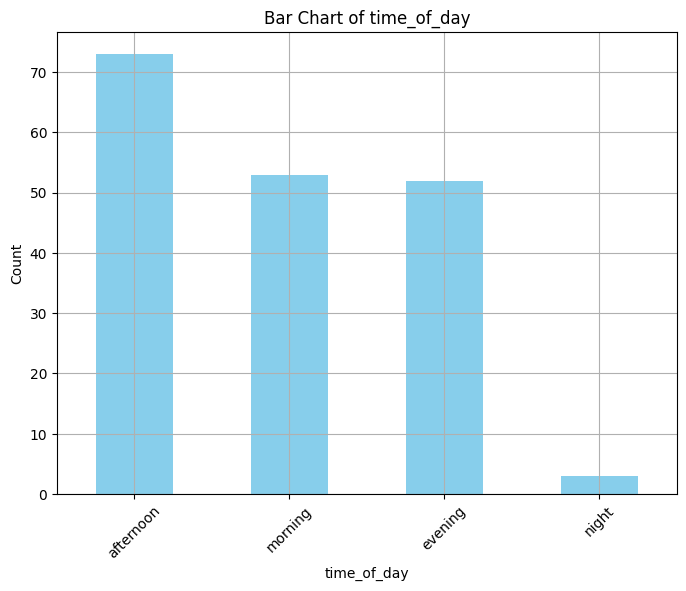

In [81]:
# plot bar chart for categorical columns 
plot_bar_charts(df_posts_categorical)

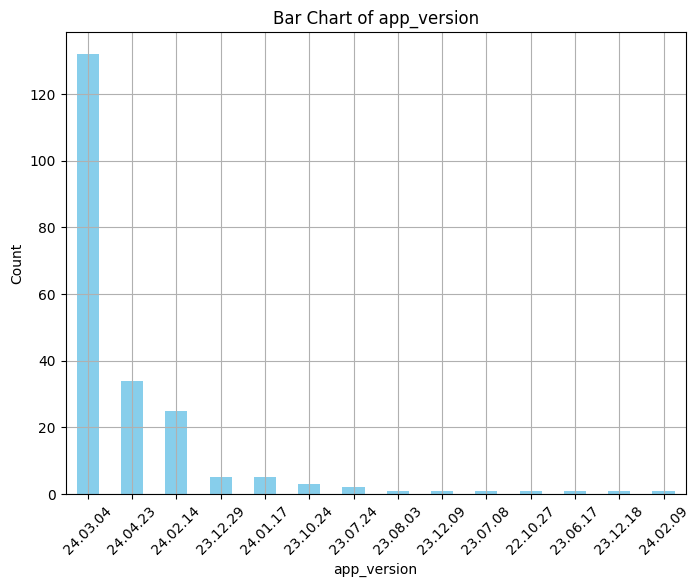

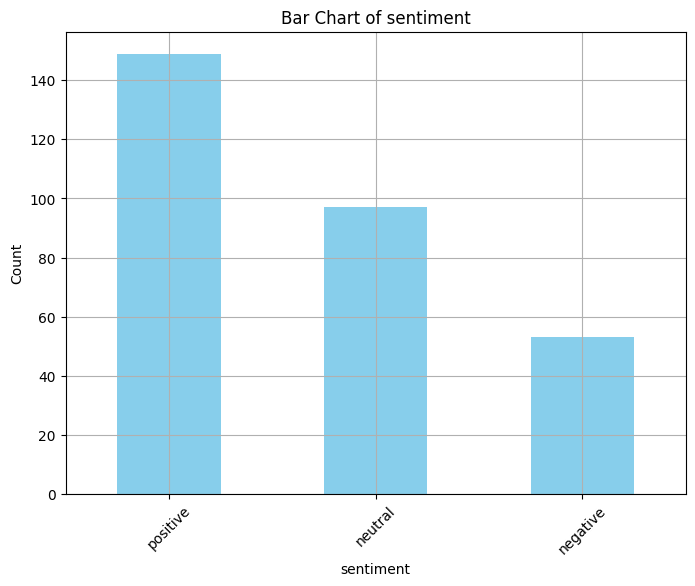

In [82]:
# plot bar chart for categorical columns 
plot_bar_charts(df_reviews_categorical)

#### Bivariate analysis

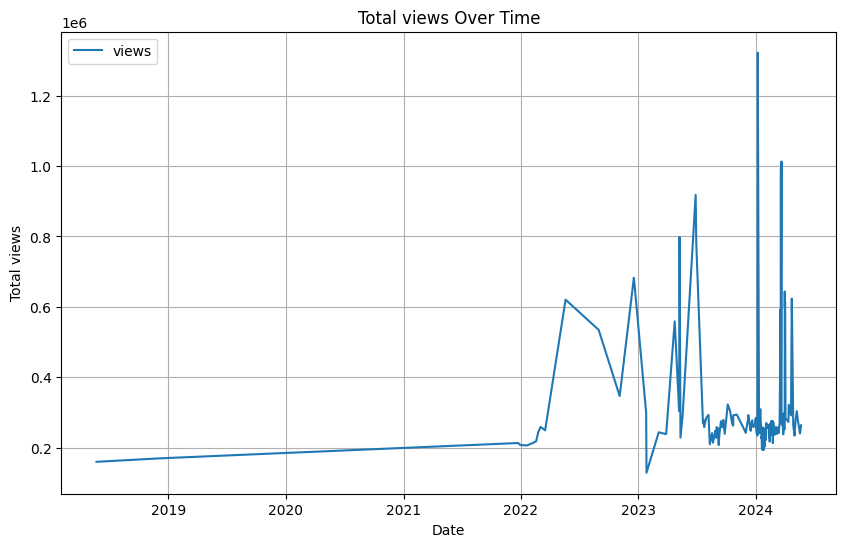

In [83]:
plot_time_series(df_posts, 'date', 'views')

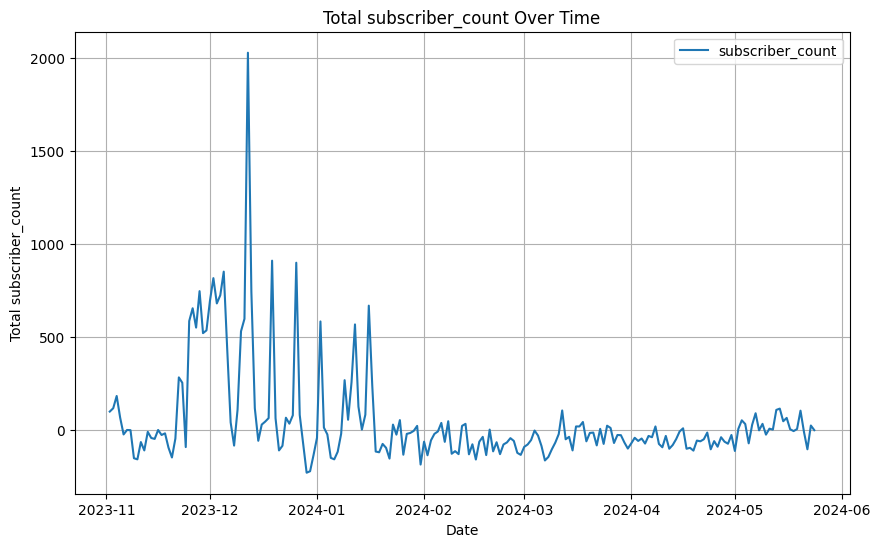

In [84]:
plot_time_series(df_subscribers, 'date', 'subscriber_count')

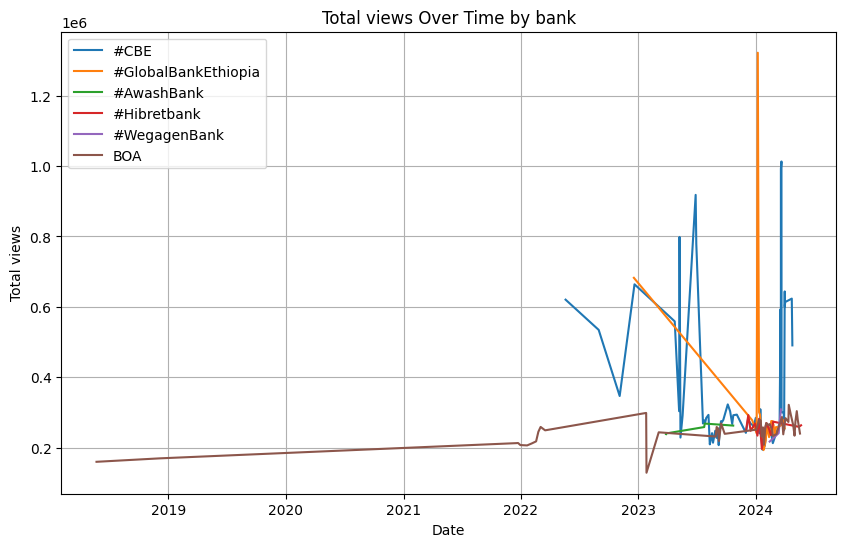

In [85]:
plot_time_series_by_category(df_posts, 'date', 'views', 'bank')

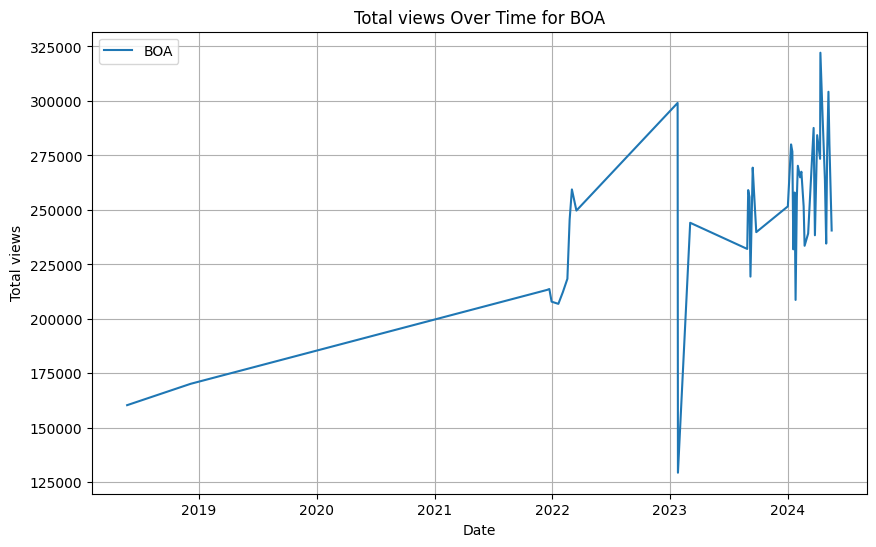

In [86]:
plot_time_series_for_single_category(df_posts, 'date', 'views', 'bank', 'BOA')

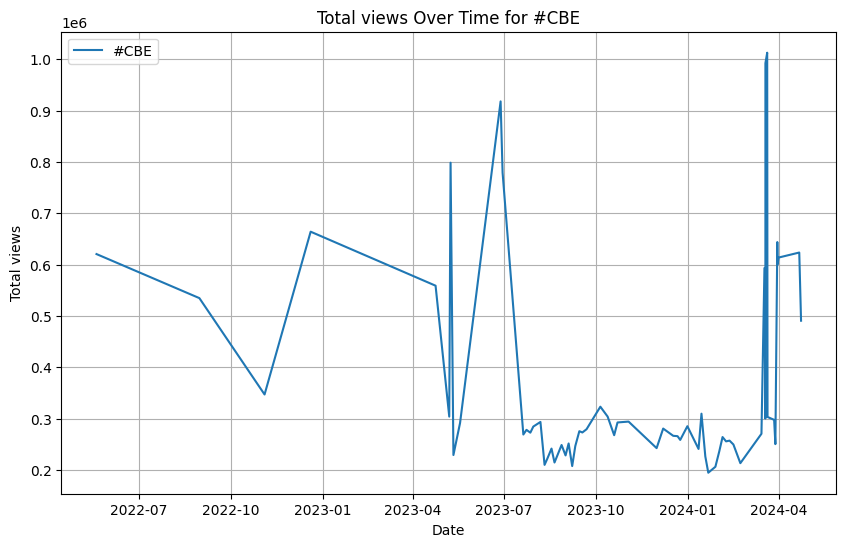

In [87]:
plot_time_series_for_single_category(df_posts, 'date', 'views', 'bank', '#CBE')

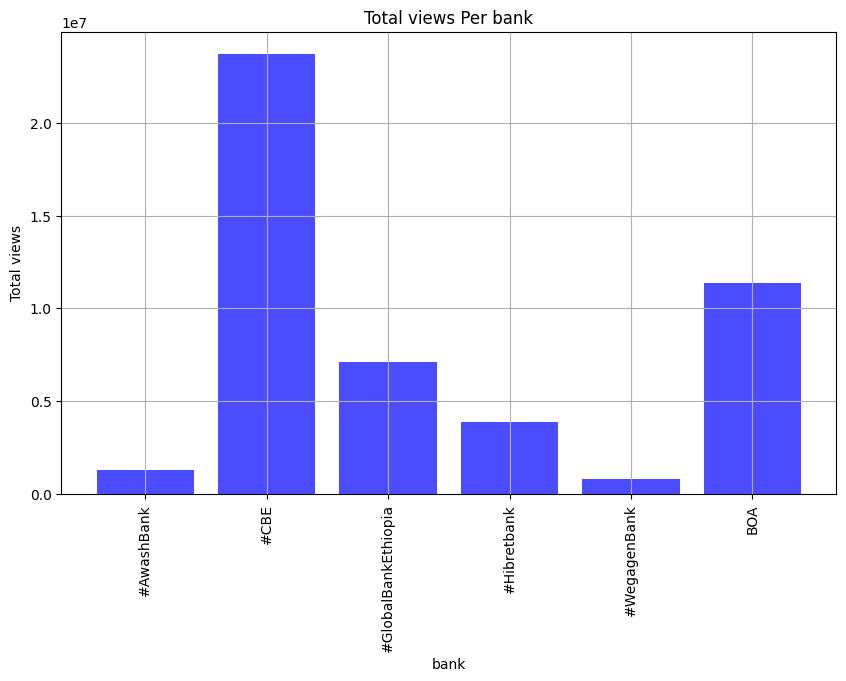

In [88]:
plot_bar_chart_for_cols(df_posts, 'views', 'bank')

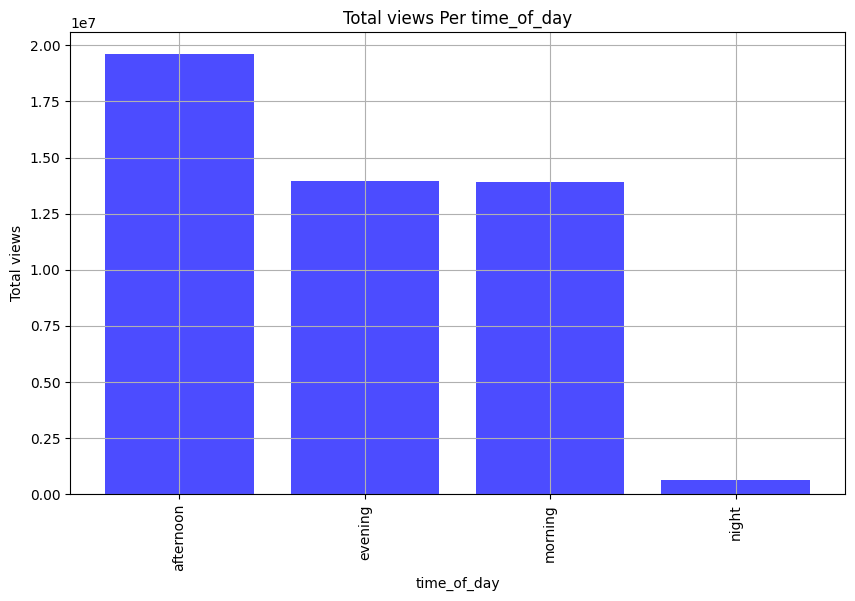

In [89]:
plot_bar_chart_for_cols(df_posts, 'views', 'time_of_day')

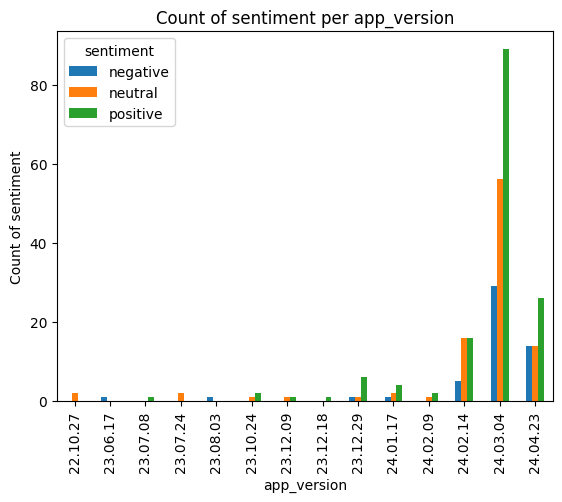

In [90]:
plot_categorical_two_cols_unstack(df_reviews, 'sentiment', 'app_version')

#### Multivariate Analysis

In [104]:
# count the reviews
df_reviews['created_at_date'] = df_reviews['created_at'].dt.date

df_review_count = df_reviews.groupby('created_at_date').size().reset_index(name='review_count')

df_review_count.tail(50)

,created_at_date,review_count
33,2024-03-28,4
34,2024-03-29,5
35,2024-03-30,1
36,2024-03-31,2
37,2024-04-02,2
38,2024-04-03,5
39,2024-04-04,3
40,2024-04-05,4
41,2024-04-06,3
42,2024-04-07,3


In [92]:
# Extract BOA from posts 
df_posts_boa = df_posts[df_posts['bank'] == 'BOA']

/home/vagrant/Marketing-Analytics-Dashboard/notebooks/../src/plots.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[date_col1] = pd.to_datetime(df1[date_col1])


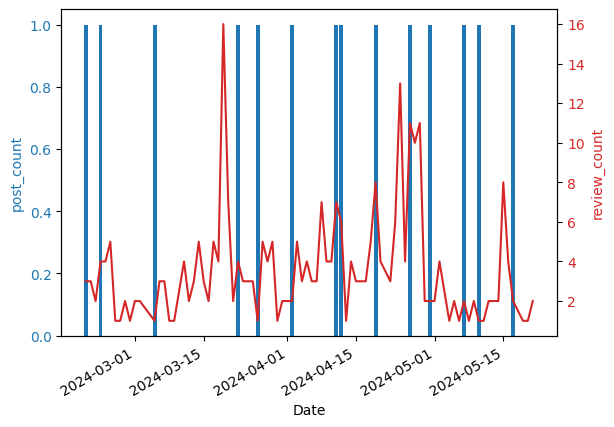

In [93]:
merged_by_date_two_cols_plot(df_posts_boa, df_review_count, 'post_count', 'review_count', 'date', 'created_at_date')

/home/vagrant/Marketing-Analytics-Dashboard/notebooks/../src/plots.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[date_col1] = pd.to_datetime(df1[date_col1])


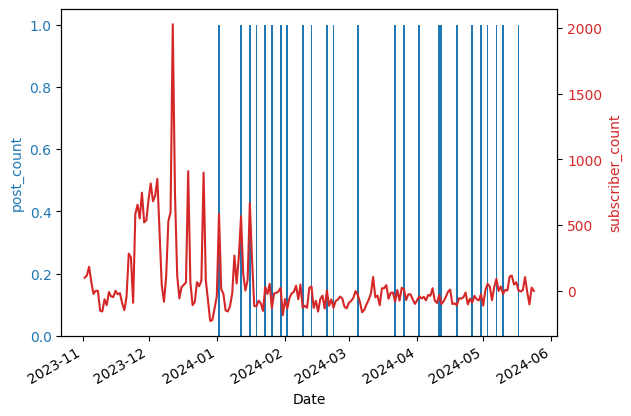

In [94]:
merged_by_date_two_cols_plot(df_posts_boa, df_subscribers, 'post_count', 'subscriber_count', 'date', 'date')

#### Correlations 

In [95]:
# BOA posts and app reviews
df_boa_posts_merge_review = merge_and_sort(df_posts_boa, df_review_count, 'date', 'created_at_date', 'post_count')
print(df_boa_posts_merge_review)

   created_at_date  review_count       date  post_count
0       2024-02-20             3 2024-02-20           1
1       2024-02-21             3        NaT           0
2       2024-02-22             2        NaT           0
3       2024-02-23             4 2024-02-23           1
4       2024-02-24             4        NaT           0
..             ...           ...        ...         ...
78      2024-05-16             4        NaT           0
79      2024-05-17             2 2024-05-17           1
80      2024-05-19             1        NaT           0
81      2024-05-20             1        NaT           0
82      2024-05-21             2        NaT           0

[83 rows x 4 columns]


/home/vagrant/Marketing-Analytics-Dashboard/notebooks/../src/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[date_col1] = pd.to_datetime(df1[date_col1])


In [96]:
correlation_matrix = df_boa_posts_merge_review[['post_count', 'review_count']].corr()
print(correlation_matrix)

              post_count  review_count
post_count      1.000000      0.038894
review_count    0.038894      1.000000


In [97]:
# BOA posts and subscribers 
df_boa_posts_merge_subscribers = merge_and_sort(df_posts_boa, df_subscribers, 'date', 'date', 'post_count')
print(df_boa_posts_merge_subscribers)

       id       date  subscriber_count  post_count
204  1628 2023-11-02                99           0
203  1627 2023-11-03               117           0
202  1626 2023-11-04               183           0
201  1625 2023-11-05                67           0
200  1624 2023-11-06               -24           0
..    ...        ...               ...         ...
4    1428 2024-05-20               104           0
3    1427 2024-05-21               -10           0
2    1426 2024-05-22              -104           0
1    1425 2024-05-23                24           0
0    1424 2024-05-24                -1           0

[205 rows x 4 columns]


/home/vagrant/Marketing-Analytics-Dashboard/notebooks/../src/utils.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[date_col1] = pd.to_datetime(df1[date_col1])


In [98]:
correlation_matrix = df_boa_posts_merge_subscribers[['post_count', 'subscriber_count']].corr()
print(correlation_matrix)

                  post_count  subscriber_count
post_count          1.000000         -0.019579
subscriber_count   -0.019579          1.000000
